In [47]:
import matplotlib.pyplot as plt
import numpy as np
import re

Processing file: lorentzian01002901_plt_data.txt
<class 'numpy.ndarray'>
Processing file: lorentzian01250101_plt_data.txt
<class 'NoneType'>
Processing file: lorentzian03002201_plt_data.txt
<class 'numpy.ndarray'>
Processing file: lorentzian03003101_plt_data.txt
<class 'NoneType'>
Processing file: lorentzian03010001_plt_data.txt
<class 'NoneType'>
Processing file: lorentzian03010101_plt_data.txt
<class 'NoneType'>


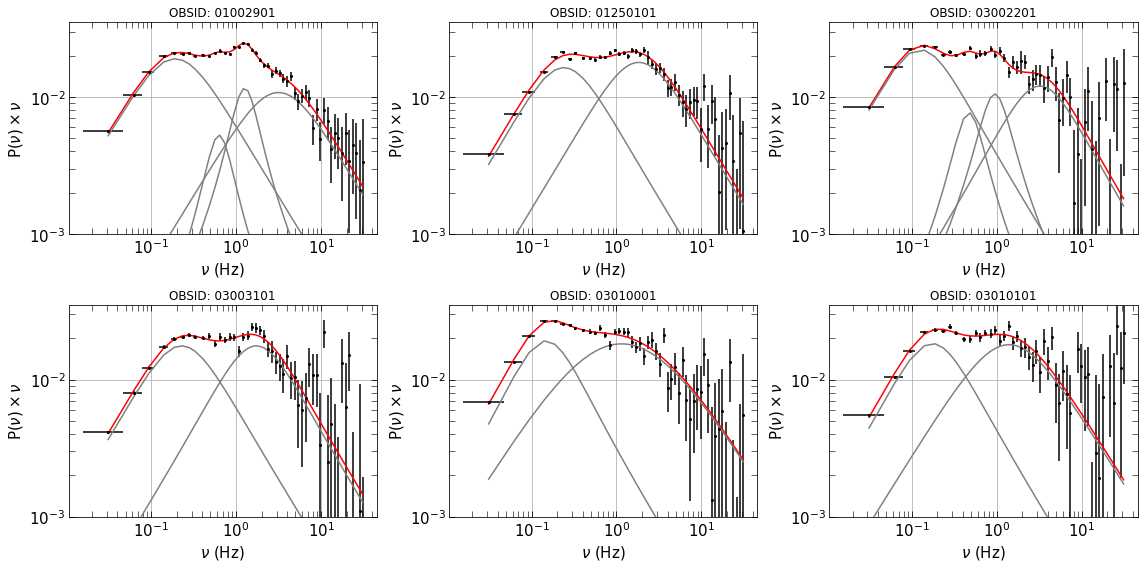

In [54]:


fig, ax = plt.subplots(2, 3, figsize=(16, 8), sharex=False)


lorentzian_files = [
    "lorentzian01002901_plt_data.txt",
    "lorentzian01250101_plt_data.txt",
    "lorentzian03002201_plt_data.txt",
    "lorentzian03003101_plt_data.txt",
    "lorentzian03010001_plt_data.txt",
    "lorentzian03010101_plt_data.txt"]

for i, file in enumerate(lorentzian_files):
    print(f"Processing file: {file}")
    data = np.loadtxt(file, skiprows=1)
    freq = data[:, 0]
    power = data[:, 1]
    xerr = data[:, 2]
    yerr = data[:, 3]
    yfit = data[:, 4]
    comp1 = data[:, 5]
    comp2 = data[:, 6]
    comp3 = data[:, 7] if data.shape[1] > 7 else None
    print(type(comp3))
    comp4 = data[:, 8] if data.shape[1] > 8 else None

    ax[i//3, i%3].errorbar(freq, power*freq, yerr=yerr*freq, xerr=xerr, fmt='o', markersize=2, label='Data', color='black')
    ax[i//3, i%3].plot(freq, yfit*freq, label='Total Fit', color='red')
    ax[i//3, i%3].plot(freq, comp1*freq, label='Component 1', linestyle='-',color='grey')
    ax[i//3, i%3].plot(freq, comp2*freq, label='Component 2', linestyle='-',color='grey')
    if comp3 is not None:
        ax[i//3, i%3].plot(freq, comp3*freq, label='Component 3', linestyle='-',color='grey')
    if comp4 is not None:
        ax[i//3, i%3].plot(freq, comp4*freq, label='Component 4', linestyle='-',color='grey')

    ax[i//3, i%3].set_xscale('log')
    ax[i//3, i%3].set_yscale('log')
    num = re.search(r"lorentzian(\d+)_", file).group(1)
    ax[i//3, i%3].set_title(f'OBSID: {num}')
    ax[i//3, i%3].set_xlabel(r'$\nu$ (Hz)',size=15)
    ax[i//3, i%3].set_ylabel(r'P($\nu)\times \nu$',size=15)
    ax[i//3, i%3].grid(True)
    ax[i//3, i%3].set_ylim(1e-3, 0.035)
    ax[i//3, i%3].tick_params(axis='both', direction='in', which='both', right=True, labelsize=15, top=True, length=6)
plt.tight_layout()
plt.savefig('lorentzian_fits_panel.png', dpi=300)
plt.show()


In [45]:
file = "lorentzian01002901_plt_data.txt"
num = file.split("lorentzian")[1].split("_")[0]
print(num)  # Output: 01002901


01002901
